In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/MyDrive/Senior_Thesis_Waseda/exp_religion')

In [3]:
%run ../Ridge.ipynb

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data.csv')
df.head()

,happiness,B_COUNTRY_ALPHA,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,Cl_4,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,7.333333,CYP,196070011,6.0,1,4.0,0.936297,-0.623011,-1.308899,-0.65273,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,8.000000,CYP,196070036,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,8.000000,CYP,196070039,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,5.333333,CYP,196070040,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,4.000000,CYP,196070053,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [5]:
income = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data_pre_cluster.csv')
income = income.loc[:, ['D_INTERVIEW','Q173P']]
income.head()

,D_INTERVIEW,Q173P
0,196070011,3
1,196070036,3
2,196070039,3
3,196070040,3
4,196070053,3


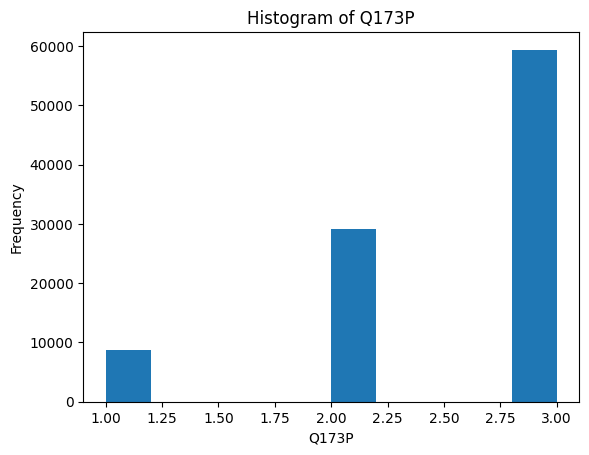

In [6]:
import matplotlib.pyplot as plt

plt.hist(income['Q173P'])
plt.xlabel('Q173P')
plt.ylabel('Frequency')
plt.title('Histogram of Q173P')
plt.show()

In [7]:
df_merged = pd.merge(income, df, on='D_INTERVIEW')
df_merged.head()

,D_INTERVIEW,Q173P,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,196070011,3,7.333333,CYP,6.0,1,4.0,0.936297,-0.623011,-1.308899,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,196070036,3,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,196070039,3,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,196070040,3,5.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,196070053,3,4.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [8]:
df_merged = df_merged[df_merged['Q173P'] < 3]
df_merged.head()

,D_INTERVIEW,Q173P,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
10,196070154,2,8.666667,CYP,7.0,1,1.0,-1.068037,-0.623011,-1.308899,...,-0.999931,0.091762,0.098696,-0.266231,-1.456204,0.884878,1,6,8,3
14,196070307,2,8.000000,CYP,6.0,1,4.0,0.936297,1.605107,0.764001,...,-0.674996,0.345949,0.976462,-1.218074,-0.272563,0.884878,1,1,5,3
20,196070358,1,7.333333,CYP,1.0,1,5.0,0.936297,-0.623011,-1.308899,...,-0.400128,-0.333150,-1.066115,0.363897,0.321602,0.257307,3,6,0,0
24,218070005,2,10.000000,ECU,7.0,0,2.0,-1.068037,-0.623011,0.764001,...,-0.288682,0.303295,0.976462,-0.742153,-1.456204,0.884878,1,6,0,0
26,218070021,2,10.000000,ECU,7.0,0,2.0,-1.068037,1.605107,0.764001,...,0.127610,-0.097453,-0.492892,1.315740,0.323946,0.884878,2,6,4,1


In [9]:
X = df_merged.loc[:, 'Cl_1':]
y = df_merged['happiness']

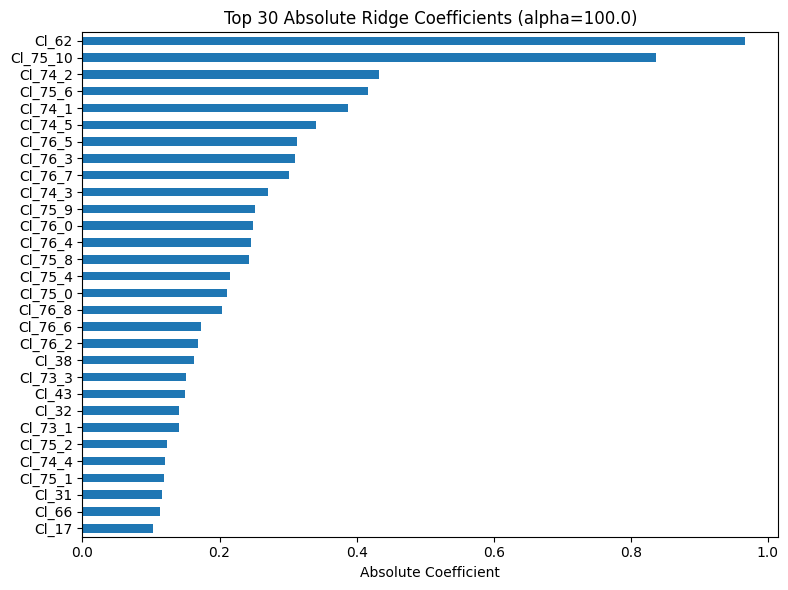

In [10]:
model, best_alpha, coeffs, perm_imp = Ridge(X,y)

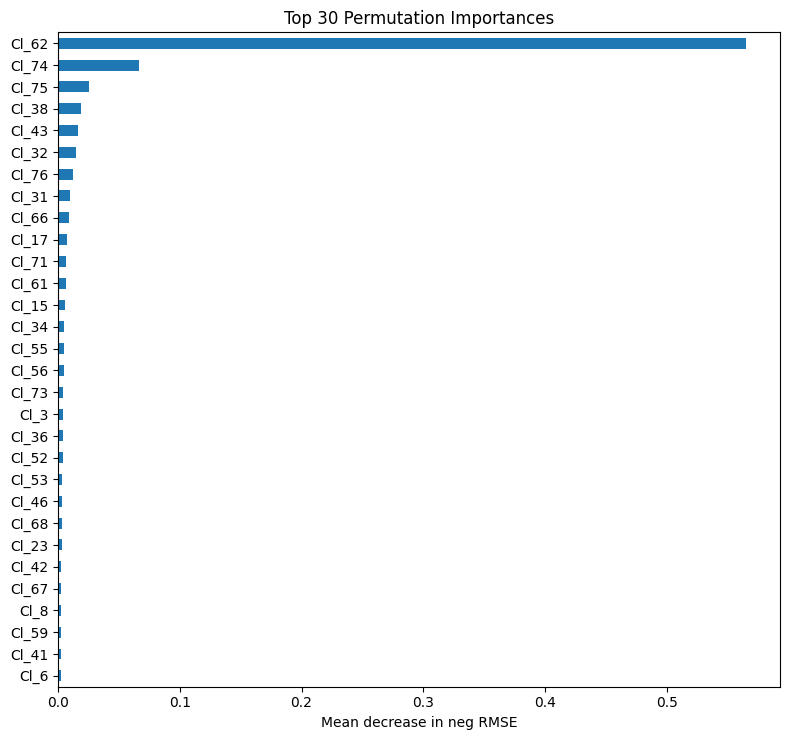

In [11]:
save_data(perm_imp, coeffs, test_name='exp_atheist')